In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # Changed to MinMaxScaler
from sklearn.decomposition import NMF

In [9]:
# Load the dataset
file_path = '/home/roshan/Documents/code/ISRO/Dataset.csv' # Replace with your CSV file path
data = pd.read_csv(file_path)

# Select numerical features for NMF -  Selecting only naturally non-negative features now
features_for_nmf = [
    'Daily Mean PM2.5 Concentration',
    'Daily AQI Value',
    'Daily Obs Count',
    'Percent Complete'
    # Removed 'Site Latitude', 'Site Longitude' as they can be negative and might not be essential for NMF on air quality measures
]

X = data[features_for_nmf].copy()

# Handle missing values (filling with mean for simplicity)
X = X.fillna(X.mean())

# Scale the data using MinMaxScaler - preserves non-negativity if original data is non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# No need to ensure non-negativity explicitly anymore with MinMaxScaler (if original features are indeed non-negative)

<Figure size 1000x800 with 0 Axes>

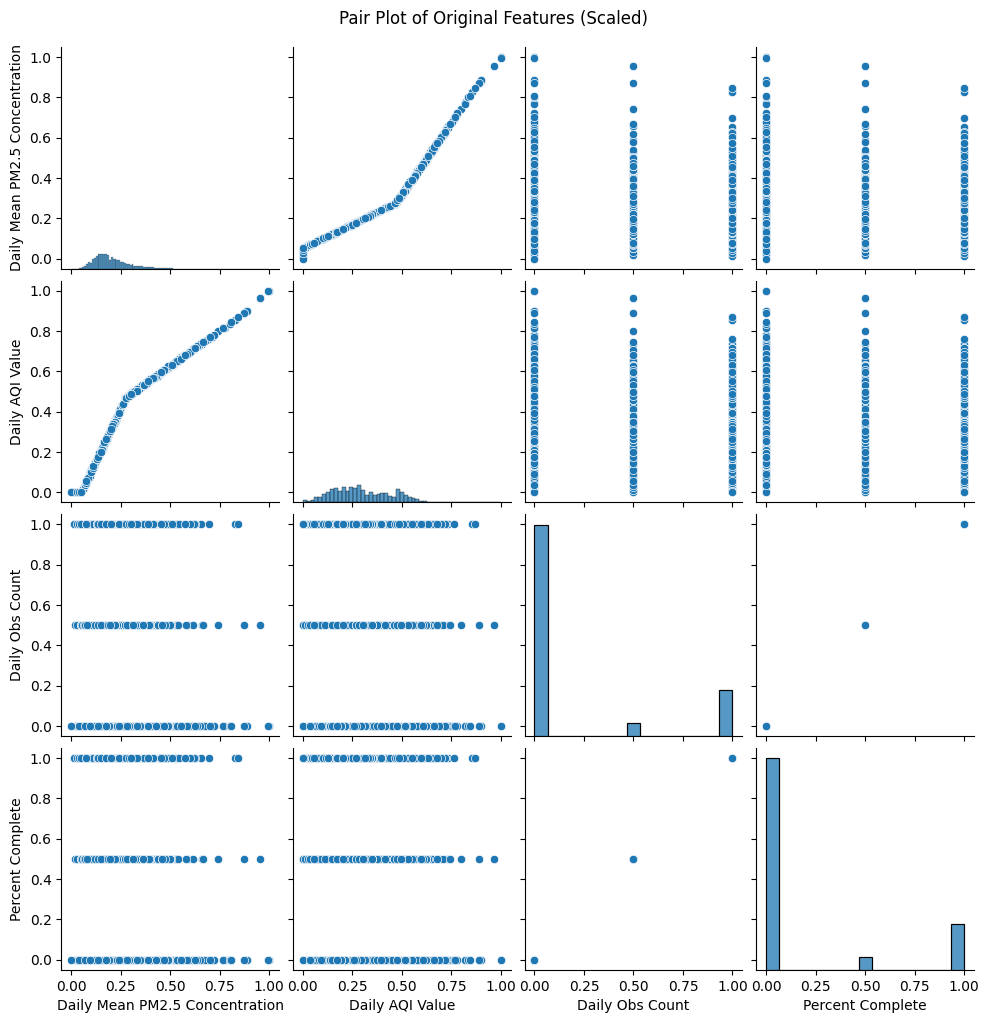

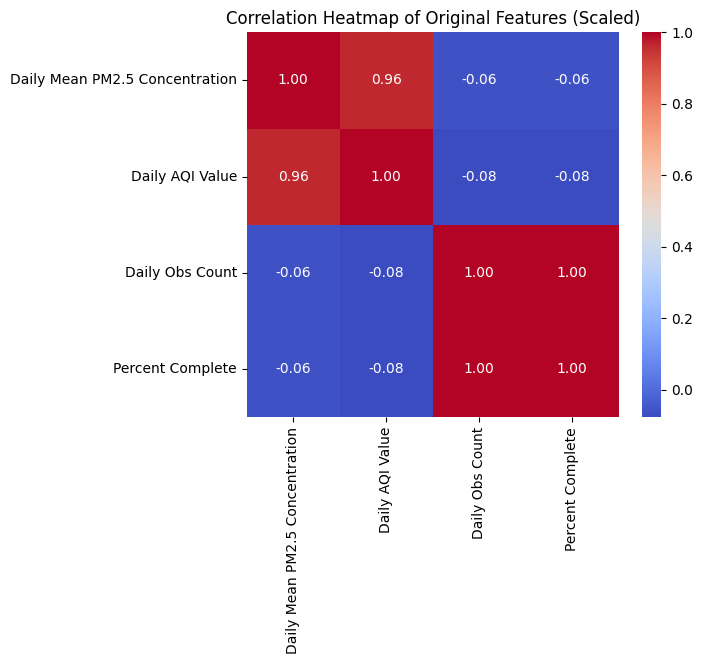

In [10]:
# Convert scaled data back to DataFrame for easier handling in visualizations
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_nmf)

# Pair Plot
plt.figure(figsize=(10, 8)) # Adjusted figure size for fewer features
sns.pairplot(X_scaled_df)
plt.suptitle('Pair Plot of Original Features (Scaled)', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 5)) # Adjusted figure size for fewer features
correlation_matrix = X_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Original Features (Scaled)')
plt.show()

In [11]:
# Apply NMF
n_components = 2 # Reduced n_components as we have fewer features now, can be tuned
nmf = NMF(n_components=n_components, init='nndsvd', random_state=0) # 'nndsvd' init for better stability
W = nmf.fit_transform(X_scaled) # W is the transformed data (coefficients), shape (n_samples, n_components)
H = nmf.components_ # H is the components matrix, shape (n_components, n_features)

/home/roshan/Documents/code/ISRO/.venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


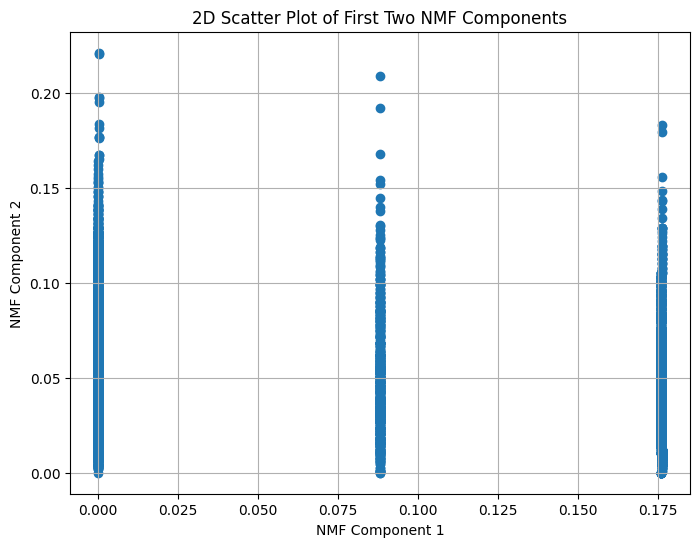

In [12]:
# Visualize first two NMF components
plt.figure(figsize=(8, 6))
plt.scatter(W[:, 0], W[:, 1]) # NMF Component 1 vs Component 2
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.title('2D Scatter Plot of First Two NMF Components')
plt.grid(True)
plt.show()

In [13]:
# NMF Components (H matrix)
components_nmf = nmf.components_
components_df = pd.DataFrame(components_nmf, columns=features_for_nmf, index=[f'NMF Comp {i+1}' for i in range(n_components)])
print("\nNMF Components (H matrix):\n")
print(components_df)


NMF Components (H matrix):

            Daily Mean PM2.5 Concentration  Daily AQI Value  Daily Obs Count  \
NMF Comp 1                        0.168305         0.184875         5.679932   
NMF Comp 2                        3.483999         5.217440         0.000000   

            Percent Complete  
NMF Comp 1          5.679932  
NMF Comp 2          0.000000  
